### Week 10 | Linear Regression 2 | data : electricity-consumptions

In [41]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('electricity-consumptions.csv')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   home_size                 10 non-null     int64
 1   kilowatt_hours_per_month  10 non-null     int64
dtypes: int64(2)
memory usage: 292.0 bytes


In [44]:
df.head()

,home_size,kilowatt_hours_per_month
0,1290,1182
1,1350,1172
2,1470,1264
3,1600,1493
4,1710,1571


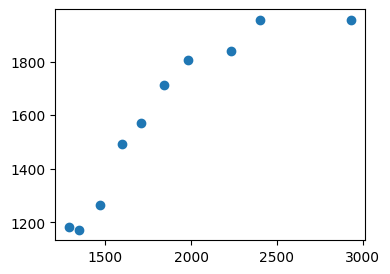

In [45]:
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.show()

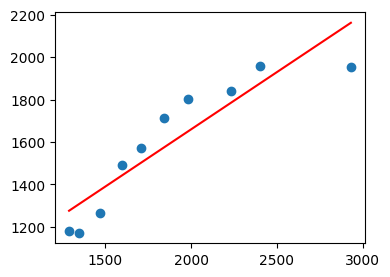

In [46]:
# import LinearRegression
from sklearn.linear_model import LinearRegression

#set att and label
att = df[['home_size'] ]
label = df['kilowatt_hours_per_month']

# create model
model = LinearRegression()

# train model
model.fit(att,label)

# set ans
ans = model.predict(att)

#Plot
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.plot(att,ans,c='r')
plt.show()

In [47]:
# model Predict
ans

array([1275.92041138, 1308.33867463, 1373.17520113, 1443.4147715 ,
       1502.84825413, 1573.0878245 , 1648.73043875, 1783.80653562,
       1875.6582815 , 2162.01960687])

In [48]:
# จุดตัดแกน
a = model.intercept_

# 
b = model.coef_

In [49]:
# ค่าความแม่นยำ
score = model.score(att , label)
score

0.831705383789123

In [50]:
# ค่าความคลาดเคลื่อน
err = 1 - score
err

0.16829461621087705

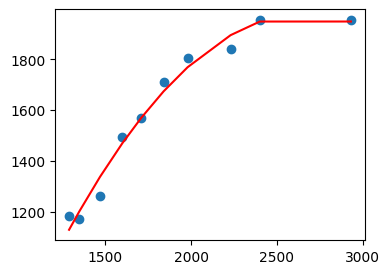

In [51]:
# เปลี่ยนเป็นอาเส้นโค้งให้มาตรงเพื่อให้ทำนายเยอะขึ้น

#import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures

#set att and label
att = df[['home_size'] ]
label = df['kilowatt_hours_per_month']

# set pf and train pf to att_new
pf = PolynomialFeatures(degree=2)
pf.fit(att)
att_new = pf.transform(att)


# create model
model = LinearRegression()

# train model
model.fit(att_new,label)

# set ans
ans = model.predict(att_new)

# Plot
plt.figure(figsize=[4,3])
plt.scatter(df['home_size'],df['kilowatt_hours_per_month'])
plt.plot(att,ans,c='r')
plt.show()

In [52]:
# ค่าความแม่นยำ
score = model.score(att_new , label)
score


0.9818850241163605

In [53]:
# ค่าความคลาดเคลื่อน
err = 1 - score
err

0.018114975883639528

In [54]:
df.sample(frac=0.7)

,home_size,kilowatt_hours_per_month
1,1350,1172
6,1980,1804
2,1470,1264
7,2230,1840
3,1600,1493
9,2930,1954
0,1290,1182
